# Experiment 1
#### 5/18/23 
In this experiment, we collected initial data to try and ask whether the inductance of the electromagnet changes in the presence of the magnetic surgical implant.

Trials:

1 x {0.5 A, 1.5 A, 2.5 A, 3.5 A, 6 A) w/o implant

1 x {0.5 A, 1.5 A, 2.5 A, 3.5 A, 6 A) w/ implant roughly 17.5 mm away

In [15]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint as pprint

In [16]:
threshold = 0.012
def parse_file(string):
    with open(string, newline='') as csvfile:
        file = csv.reader(csvfile, delimiter=' ', quotechar='|')
        dataTitles = []
        for row in file: dataTitles += [row]

    data = dataTitles[16:] # ['1232,2234']
    
    # convert array of strings to floats
    results = []
    for string in data[:-1]:
        friend = string[0]
        arr = friend.split(',')
        for i in range(len(arr)):
            arr[i] = float(arr[i])
        results += [arr]
        
    # extract time and current
    times = []
    current = []
    for index in range(len(results)): 
        times += [results[index][0]]
        current += [results[index][1]]

    # len(times) should equal len(current)
    
    # subtract out average of first 1000 indices
    cutoff = 2000
    av = np.average(current[0:cutoff])
    for x in range(cutoff): current[x] -= av
    
    # PEAK DETECTION  
    count = 1 # start from 1 so you can access index after peak starts
    for index in range(len(current)):
        if current[index] > threshold: 
            # this is a peak, therefore this is where the array should start
            break
        count += 1
    
    interval = 10000 #go from count to 7500 indices after
    
    return times[count:count +interval], current[count:count +interval]

# Data structure setup
Commanded battery voltage as keys; file names as entries corresponding to commanded battery voltage.

Commanded battery voltage computed as: requested Teensy current (0.5, 1.5, 2.5, 3.5, 6 amps) * resistance (1.6 ohms).

In [17]:
# files for commanded_battery_voltage_no_implant
voltage_without = {
    0.8: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00004.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00005.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00006.CSV'],
    
    2.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00009.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00010.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00011.CSV'],
    
    4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00012.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00013.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00014.CSV'],
    
    5.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00015.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00016.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00017.CSV'],
    
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00018.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00019.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00020.CSV']
}

voltage_with = {
    0.8: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00021.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00022.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00023.CSV'],
    
    2.4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00024.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00025.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00026.CSV'],
    
    4: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00027.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00028.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00029.CSV'],
    
    5.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00030.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00031.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00032.CSV'],
    
    9.6: ['/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00033.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00034.CSV',
    '/Users/raoshilpa/Desktop/Inductive Sensing Experiments/5-18-23_Exp1/TEK00035.CSV']
}

numTrials = len(voltage_with[9.6])

# Inductance calculations & plotting

In [18]:
# calculate inductance instantaneously, put into array, graph against time
res = 1.6
sampling_rate = 312000 # 312 kS/s on oscilloscope
file_colors = ['olivedrab','firebrick','mediumblue']
# moving_average = 2000

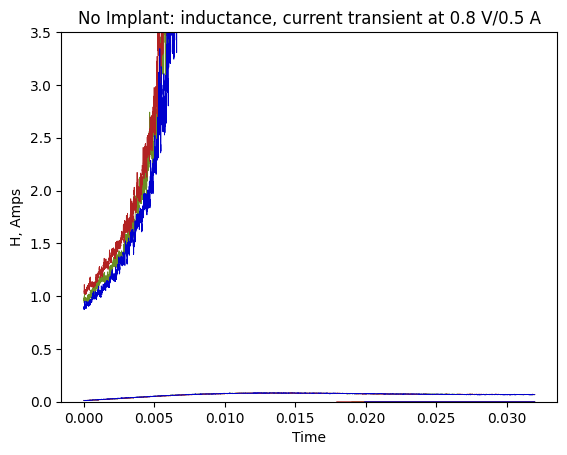

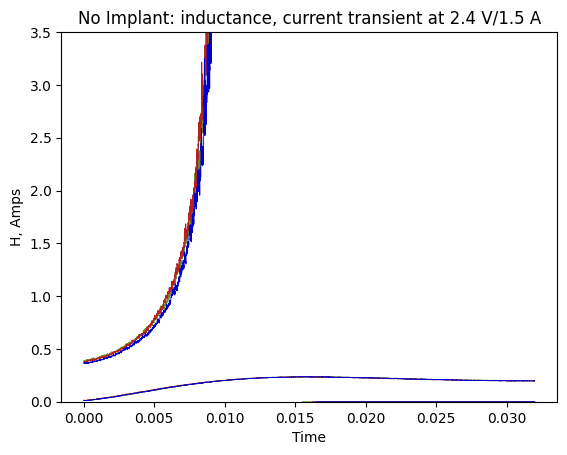

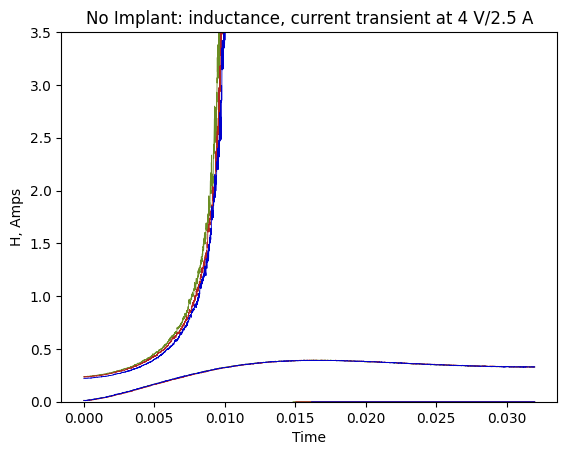

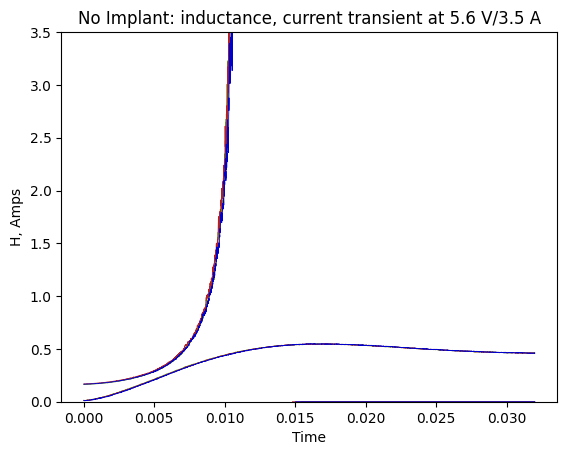

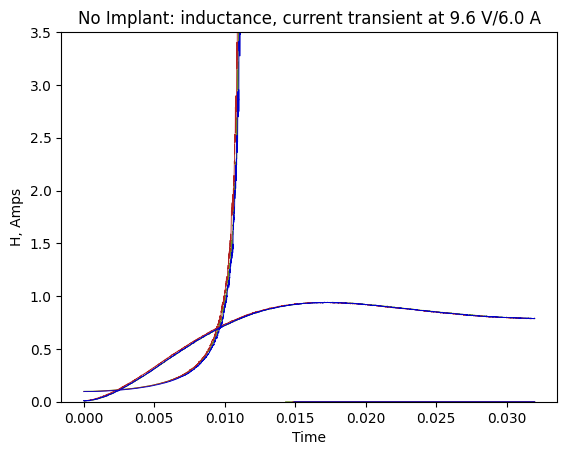

In [19]:
''' Plot inductance from no-implant test cases '''
inductance_without = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
time_without = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
current_without = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
single_inductance_without = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
# moving_average = 3000

for commanded_batt_v in voltage_without: # iterate through all amp trials (0.5, 1.5, 2.5, 3.5, 6)
    
    for i in range(numTrials): # three trials, three files

        inductance = []
        times, current = parse_file(voltage_without[commanded_batt_v][i])
        moving_average = np.argmax(current)
        
        # 0 out times array
        start = times[0]
        for ind in range(len(times)): times[ind] = times[ind] - start
        count = 0
        
        for index in range(len(current) - moving_average): #iterate through current from o-scope to calculate instantaneous inductance
            
            # NUMERATOR
            
            curr_av = 0 # average current from i ndex to index + moving_average
            for x in range(moving_average): curr_av += current[x]
            curr_av = curr_av / moving_average
            
            time_window = moving_average / sampling_rate
            
            voltage_integral = (40 - 1.6 * curr_av) * time_window
            
            # DENOMINATOR
                                        # left end of window
            i_t0 = current[index] * 7.5 # scaled by 7.5 per the datasheet from the ESCON Motor Driver

            i_t = current[index + moving_average] * 7.5 #right end of window

            curr_diff = i_t - i_t0 
            
            # NUM/DENOM
            
            if curr_diff < 1e-8:
                curr_inductance = np.nan
            else: 
                curr_inductance = voltage_integral / curr_diff
            
            # curr_inductance = voltage_integral / (curr_current_diff + 0.00000000001) #to avoid div by 0... kinda jank though
            inductance += [curr_inductance]
            
            if count == 0: 
                single_inductance_without[commanded_batt_v] += [curr_inductance]
                count = 1
            
        inductance += [0]*moving_average
        
        # save inductance for error calculations
        inductance_without[commanded_batt_v] += [inductance]
        time_without[commanded_batt_v] += [times]
        current_without[commanded_batt_v] += [current]
        
        for index in range(len(inductance)): inductance[index] = inductance[index] * 1
        plt.figure(commanded_batt_v) # split it up by commanded battery voltage
        plt.plot(times,inductance, file_colors[i], linewidth = 0.6)
        plt.plot(times,current, file_colors[i], linewidth = 0.6)
        plt.ylim(0,3.5)
        plt.xlabel('Time')
        plt.ylabel('H, Amps')
        plt.title('No Implant: inductance, current transient at ' + str(commanded_batt_v) + ' V/' + str(round(commanded_batt_v/res,1)) + ' A')

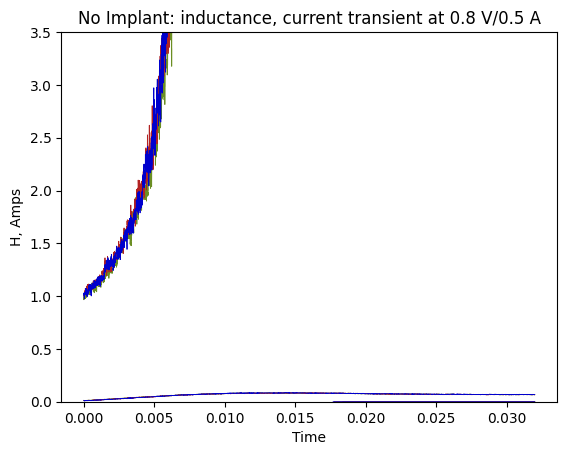

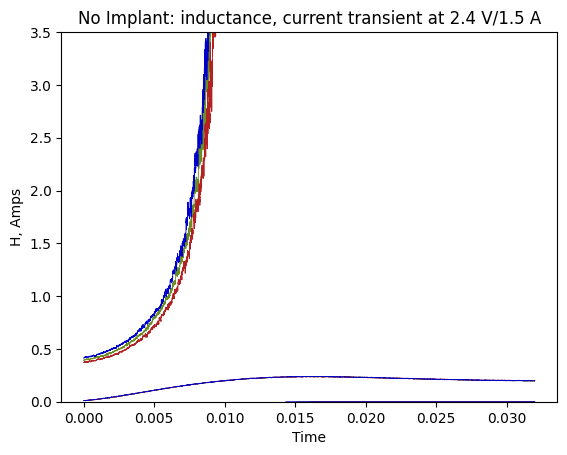

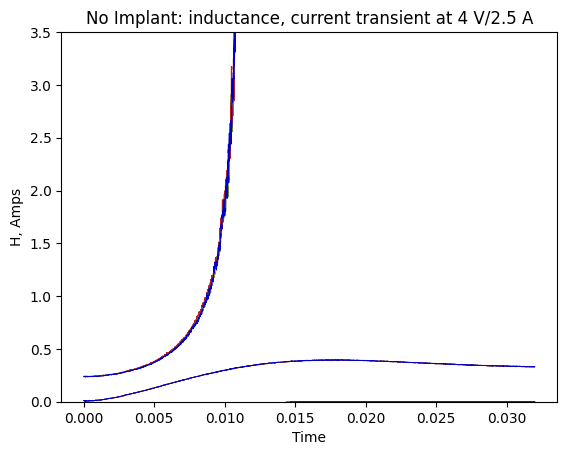

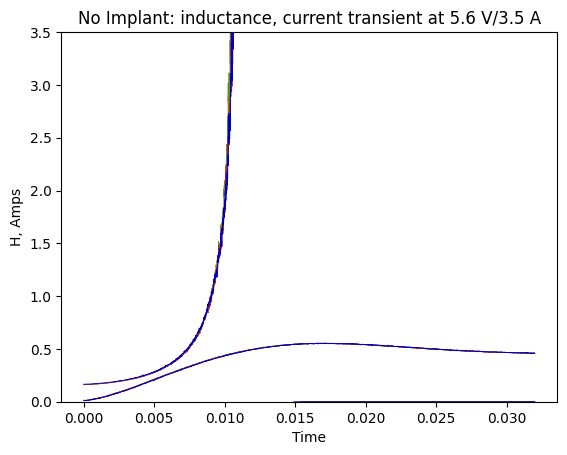

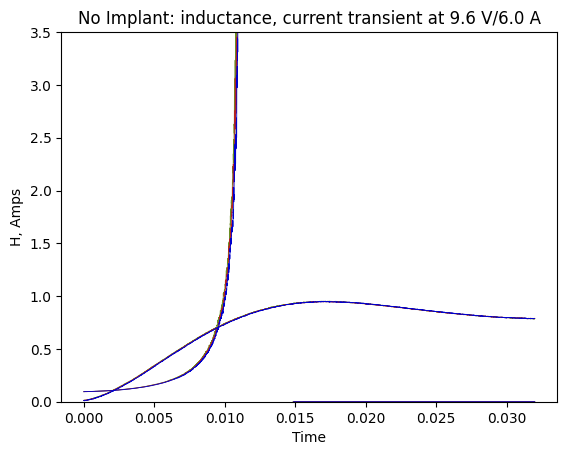

In [20]:
''' Plot inductance from implant test cases '''
inductance_with = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
current_plot_dict_imp = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
time_with = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
current_with = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
single_inductance_with = {0.8: [], 2.4: [], 4: [], 5.6: [], 9.6: []}
# moving_average = 3000

for commanded_batt_v in voltage_with: # iterate through all amp trials (0.5, 1.5, 2.5, 3.5, 6)
    
    for i in range(numTrials): # three trials, three files

        inductance = []
        times, current = parse_file(voltage_with[commanded_batt_v][i])
        moving_average = np.argmax(current)
        
        # 0 out times array
        start = times[0]
        for ind in range(len(times)): times[ind] = times[ind] - start
        count = 0
        
        for index in range(len(current) - moving_average): #iterate through current from o-scope to calculate instantaneous inductance
            
            # NUMERATOR
            
            curr_av = 0 # average current from i ndex to index + moving_average
            for x in range(moving_average): curr_av += current[x]
            curr_av = curr_av / moving_average
            
            time_window = moving_average / sampling_rate
            
            voltage_integral = (40 - 1.6 * curr_av) * time_window
            
            # DENOMINATOR
                                        # left end of window
            i_t0 = current[index] * 7.5 # scaled by 7.5 per the datasheet from the ESCON Motor Driver

            i_t = current[index + moving_average] * 7.5 #right end of window

            curr_diff = i_t - i_t0 
            
            # NUM/DENOM
            
            if curr_diff < 1e-8:
                curr_inductance = np.nan
            else: 
                curr_inductance = voltage_integral / curr_diff
            
            # curr_inductance = voltage_integral / (curr_current_diff + 0.00000000001) #to avoid div by 0... kinda jank though
            inductance += [curr_inductance]
            
            if count == 0: 
                single_inductance_with[commanded_batt_v] += [curr_inductance]
                count = 1
            
        inductance += [0]*moving_average
        
        # save inductance for error calculations
        inductance_with[commanded_batt_v] += [inductance]
        time_with[commanded_batt_v] += [times]
        current_with[commanded_batt_v] += [current]
        
        for index in range(len(inductance)): inductance[index] = inductance[index] * 1
        plt.figure(commanded_batt_v) # split it up by commanded battery voltage
        plt.plot(times,inductance, file_colors[i], linewidth = 0.6)
        plt.plot(times,current, file_colors[i], linewidth = 0.6)
        plt.ylim(0,3.5)
        plt.xlabel('Time')
        plt.ylabel('H, Amps')
        plt.title('No Implant: inductance, current transient at ' + str(commanded_batt_v) + ' V/' + str(round(commanded_batt_v/res,1)) + ' A')
        
        #there's some noise in the 0.8 commanded battery voltage files


## Inductance Error Plots
Format: 

Inductance_with = {0.8: [ [1] [2] [3] ], 2.4: [], 4: [], 5.6: [], 9.6: []}, where 1,2,3 are for the trials 1, 2, and 3.

#### Continuous moving average inductance calculations 
(in above inductance calculations, moving_average window depends on where maximum is)

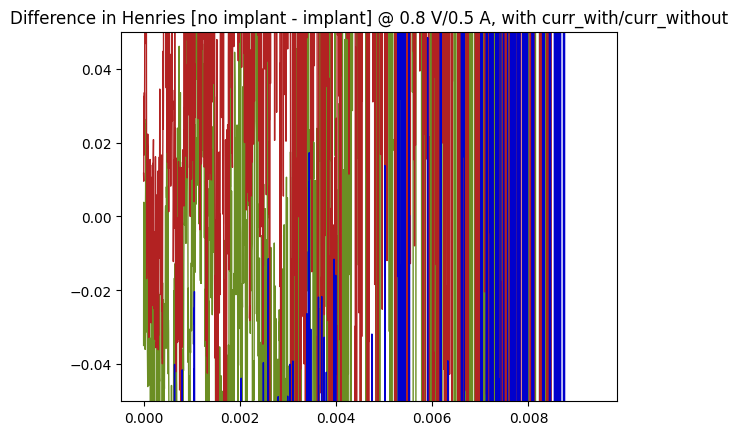

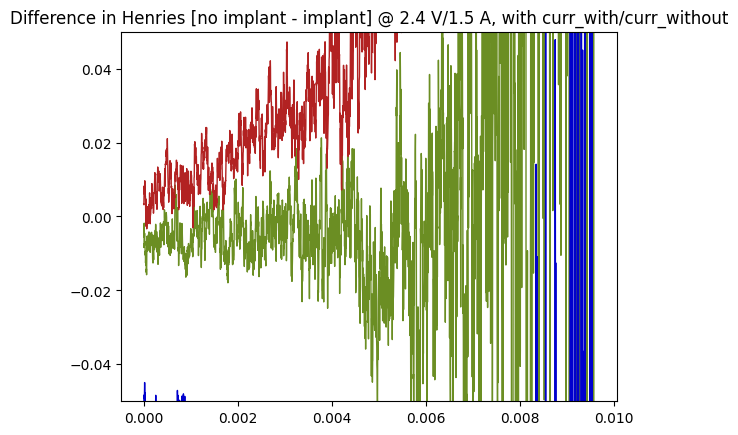

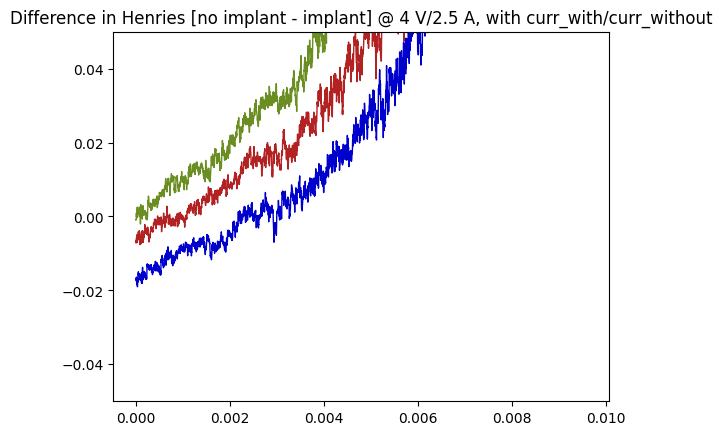

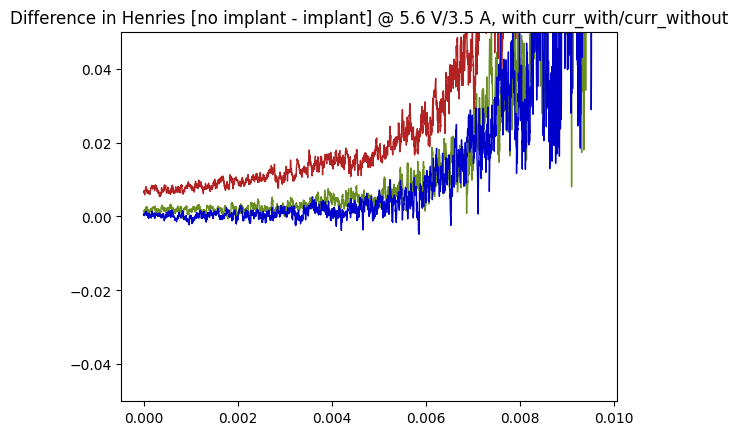

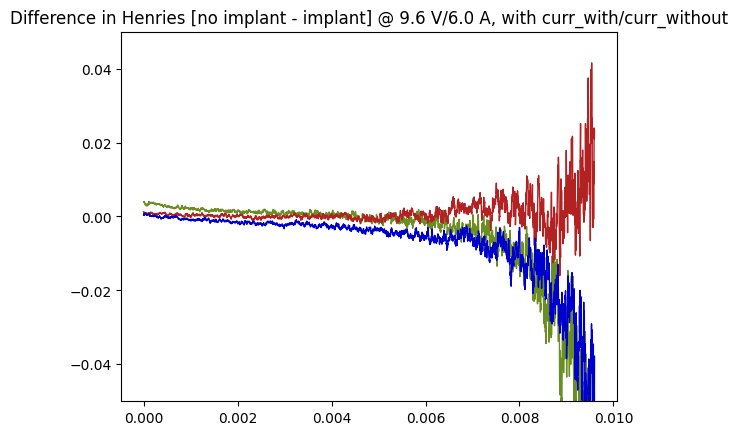

In [22]:
for commanded_batt_v in inductance_without:
    
    scale = 100
    for i in range(numTrials): # i = [ arr of inductances ]
        ind_wo = inductance_without[commanded_batt_v][i]
        ind_w = inductance_with[commanded_batt_v][i]
        ind_error = []
        for x in range(len(ind_wo)): ind_error += [ind_wo[x] - ind_w[x]] #might be negative
        plt.figure(commanded_batt_v) # split it up by commanded battery voltage
        plt.plot(time_with[commanded_batt_v][i][0:3000], ind_error[0:3000], file_colors[i], linewidth = 1)
        
        # scale = 500
        
        curr_with_scaled = []
        for ex in range(len(current_with[commanded_batt_v][i])):
            curr_with_scaled += [current_with[commanded_batt_v][i][ex] * scale]
        # plt.plot(time_with[commanded_batt_v][i], curr_with_scaled, file_colors[i], linewidth = 1)
        
        curr_without_scaled = []
        for ex in range(len(current_without[commanded_batt_v][i])):
            curr_without_scaled += [current_without[commanded_batt_v][i][ex] * scale]
        # plt.plot(time_without[commanded_batt_v][i], curr_without_scaled, file_colors[i], linewidth = 1)
        
        plt.ylim(-.05,.05)
        
        # check if time arrays for without and with are equal - should be linear
        # plt.plot(time_with[commanded_batt_v][i], time_without[commanded_batt_v][i])
        
        plt.title('Difference in Henries [no implant - implant] @ ' + str(commanded_batt_v) + ' V/' + str(round(commanded_batt_v/res,1)) + ' A' + ', with curr_with/curr_without')
        

#### Single inductance calculations

In [25]:
print("Calculating inductance once, from index 0 to index of maximum for each current transient:" + "\n")

for commanded_batt_v in voltage_with: # iterate through all amp trials (0.5, 1.5, 2.5, 3.5, 6)
    
    for i in range(numTrials):
        diff = single_inductance_without[commanded_batt_v][i] - single_inductance_with[commanded_batt_v][i]
        cbv_s = str(commanded_batt_v)
        i_s = str(i)
        print("Commanded Batt V " + cbv_s + ", File " + i_s + ", 17.5 mm gap distance = " + str(single_inductance_with[commanded_batt_v][i]) + "H")
    
    print("\n")

Calculating inductance once, from index 0 to index of maximum for each current transient:

Commanded Batt V 0.8, File 0, 17.5 mm gap distance = 0.975886727384355H
Commanded Batt V 0.8, File 1, 17.5 mm gap distance = 1.0156391996767098H
Commanded Batt V 0.8, File 2, 17.5 mm gap distance = 1.0189508900611914H


Commanded Batt V 2.4, File 0, 17.5 mm gap distance = 0.3924567019453914H
Commanded Batt V 2.4, File 1, 17.5 mm gap distance = 0.3705070887443807H
Commanded Batt V 2.4, File 2, 17.5 mm gap distance = 0.4108789712547318H


Commanded Batt V 4, File 0, 17.5 mm gap distance = 0.23762371469367147H
Commanded Batt V 4, File 1, 17.5 mm gap distance = 0.24129988319398588H
Commanded Batt V 4, File 2, 17.5 mm gap distance = 0.23652197801259173H


Commanded Batt V 5.6, File 0, 17.5 mm gap distance = 0.16159144582160556H
Commanded Batt V 5.6, File 1, 17.5 mm gap distance = 0.16155592338731292H
Commanded Batt V 5.6, File 2, 17.5 mm gap distance = 0.16579941718279742H


Commanded Batt V 9.6, File

Our inductance vs. current transient plots look correct - they are consistent until the current transient reaches steady state, at which point the inductance is techincally undefined by the standard equation V = L*di/dt.
Right now, our error calculations aren't promising with respect to convincing us that the inductance does change. We're getting varied differences across files, nothing really consistent. It would be more convincing if all the numbers were positive and on the same order of magnitude. But even within a singular commanded battery voltage, the numbers drastically differ.
Thus, I'm not convinced by my code that the inductance actually does change in the presence of the ferromagnetic implant.
I'm referencing Kamf, Abrahamsson et. al (https://drive.google.com/drive/u/1/folders/1mbKpxpIC3nW242HnE0ujfJBIPxeYxvV5) to see if they did anything different wrt. considering pwm, calculating inductance, etc.